# **What are Gaussian Mixture Models?**
Before we discuss Gaussian Mixture Models (GMMs), let's understand what Mixture Models are. A Mixture Model is a type of probability density model where we assume that the data is governed by a number of component distributions. If these distributions are Gaussian, then the model becomes a Gaussian Mixture Model. These component distributions are combined in order to provide a multi-modal density function, which becomes a mixture model.

Let's look at an example to understand how Mixture Models work. We want to model the shopping habits of all the people in South America. One way to do it would be model the whole continent and fit everything into a single model. But we know that people in different countries shop differently. We need to understand how people in individual countries shop and how they behave.

If we want to get a good representative model, we need to account for all the variations within the continent. In this case, we can use mixture models to model the shopping habits of individual countries and then combine all of them into a Mixture Model. This way, we are not missing the nuances of the underlying behavior of individual countries. By not enforcing a single model on all the countries, we are able to extract a more accurate model.

An interesting thing to note is that mixture models are semi-parametric, which means that they are partially dependent on a set of predefined functions. They are able to provide greater precision and flexibility in modeling the underlying distributions of our data. They can smooth the gaps that result from having sparse data. 

If we define the function, then the mixture model goes from being semi-parametric to parametric. Hence a GMM is a parametric model represented as a weighted summation of component Gaussian functions. We assume that the data is being generated by a set of Gaussian models that are combined in some way. GMMs are very powerful and are used across many fields. The parameters of the GMM are estimated from training data using algorithms like Expectation–Maximization (EM) or Maximum A-Posteriori (MAP) estimation. Some of the popular applications of GMM include image database retrieval, modeling stock market fluctuations, biometric verification, and so on.

# Building a classifier based on Gaussian Mixture Models

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

In [4]:
from sklearn import datasets
from sklearn.mixture import GaussianMixture # GMM has been removed from scikit-learn as of version 0.20+.
from sklearn.model_selection import StratifiedKFold

# Load the iris dataset

In [5]:
iris = datasets.load_iris()

In [12]:
type(iris)

sklearn.utils._bunch.Bunch

In [14]:
iris.data.shape  # (150, 4)

(150, 4)

In [15]:
iris.target.shape  # (150,)

(150,)

# Split dataset into training and testing (80/20 split)
Split the dataset into training and testing using an 80/20 split. The ```n_folds``` parameter specifies the number of subsets you'll obtain. We are using a value of 5, which means the dataset will be split into five parts. We will use four parts for training and one part for testing, which gives a split of 80/20:

In [8]:
y = iris.target

In [9]:
indices = StratifiedKFold(n_splits=5)

# Take the first fold

In [16]:
train_index, test_index = next(iter(indices.split(iris.data, y)))

# Extract training data and labels

In [17]:
X_train = iris.data[train_index]
y_train = iris.target[train_index]

# Extract testing data and labels

In [18]:
X_test = iris.data[test_index]
y_test = iris.target[test_index]

# Extract the number of classes
Extract the number of classes in the training data:

In [28]:
num_classes = len(np.unique(y_train))

# Build GMM
Build a GMM-based classifier using the relevant parameters. The ```n_components``` parameter specifies the number of components in the underlying distribution. In this case, it will be the number of distinct classes in our data. We need to specify the type of covariance to use. In this case, we will be using full covariance. The ```init_params``` parameter controls the parameters that need to be updated during the training process. We have used ```kmeans``` (old: ```wc```), which means weights and covariance parameters will be updated during training. The ```max_iter``` (old: ```n_iter```) parameter refers to the number of Expectation-Maximization iterations that will be
performed during training:

In [29]:
classifier = GaussianMixture(
      n_components = num_classes
    , covariance_type = 'full'
    , init_params = 'kmeans'
    , max_iter = 20
)

# Initialize the GMM means 
Initialize the means of the classifier:

In [30]:
classifier.means_ = np.array(
    [X_train[y_train == i].mean(axis=0) for i in range(num_classes)]
)

# Train the GMM classifier 
Train the Gaussian mixture model classifier using the training data:

In [31]:
classifier.fit(X_train)

c:\Users\aashi\GitHub\9781786464392\venv\Lib\site-packages\sklearn\mixture\_base.py:275: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


,n_components,3
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,20
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,None


# Draw boundaries
Visualize the boundaries of the classifier. We will extract the eigenvalues and eigenvectors
to estimate how to draw the elliptical boundaries around the clusters.

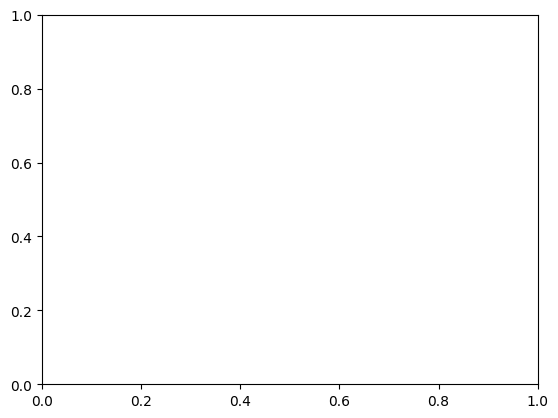

In [33]:
plt.figure()
colors = 'bgr'
for i, color in enumerate(colors):
        # Extract eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(
                # classifier._get_covars()[i][:2, :2]
                classifier.covariances_[i][:2, :2]
        )
        
        # Normalize the first eigenvector
        norm_vec = eigenvectors[0] / np.linalg.norm(eigenvectors[0])
        
        # Extract the angle of tilt
        angle = np.arctan2(norm_vec[1], norm_vec[0])
        angle = 180 * angle / np.pi 
        
        # Scaling factor to magnify the ellipses
        # (random value chosen to suit our needs)
        scaling_factor = 8
        eigenvalues *= scaling_factor 
        
        # Draw the ellipse
        ellipse = patches.Ellipse(
                xy=classifier.means_[i, :2], 
                width=eigenvalues[0], 
                height=eigenvalues[1], 
                angle=180 + angle, 
                color=color
        )
        axis_handle = plt.subplot(1, 1, 1)
        ellipse.set_clip_box(axis_handle.bbox)
        ellipse.set_alpha(0.6)
        axis_handle.add_artist(ellipse)

# Plot the data 

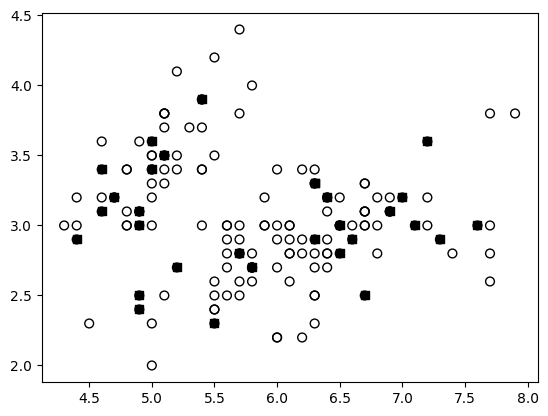

In [34]:
colors = 'bgr'
for i, color in enumerate(colors):
    cur_data = iris.data[iris.target == i]
    plt.scatter(cur_data[:,0], cur_data[:,1], marker='o', 
            facecolors='none', edgecolors='black', s=40, 
            label=iris.target_names[i])

    test_data = X_test[y_test == i]
    plt.scatter(test_data[:,0], test_data[:,1], marker='s', 
            facecolors='black', edgecolors='black', s=40, 
            label=iris.target_names[i])

# Draw the Boundaries and then Plot the data 

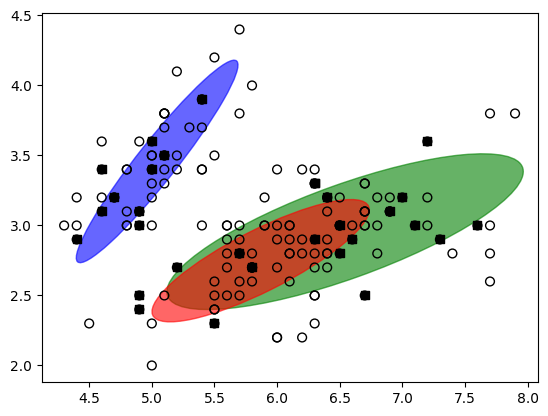

In [37]:
plt.figure()
colors = 'bgr'
for i, color in enumerate(colors):
    # Extract eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(
            classifier.covariances_[i][:2, :2])

    # Normalize the first eigenvector
    norm_vec = eigenvectors[0] / np.linalg.norm(eigenvectors[0])

    # Extract the angle of tilt
    angle = np.arctan2(norm_vec[1], norm_vec[0])
    angle = 180 * angle / np.pi 

    # Scaling factor to magnify the ellipses
    # (random value chosen to suit our needs)
    scaling_factor = 8
    eigenvalues *= scaling_factor 

    # Draw the ellipse
    ellipse = patches.Ellipse(
                xy=classifier.means_[i, :2], 
                width=eigenvalues[0], 
                height=eigenvalues[1], 
                angle=180 + angle, 
                color=color
        )
    axis_handle = plt.subplot(1, 1, 1)
    ellipse.set_clip_box(axis_handle.bbox)
    ellipse.set_alpha(0.6)
    axis_handle.add_artist(ellipse)

colors = 'bgr'
for i, color in enumerate(colors):
    cur_data = iris.data[iris.target == i]
    plt.scatter(cur_data[:,0], cur_data[:,1], marker='o', 
            facecolors='none', edgecolors='black', s=40, 
            label=iris.target_names[i])

    test_data = X_test[y_test == i]
    plt.scatter(test_data[:,0], test_data[:,1], marker='s', 
            facecolors='black', edgecolors='black', s=40, 
            label=iris.target_names[i])

# Compute predictions for training and testing data

In [38]:
y_train_pred = classifier.predict(X_train)
accuracy_training = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print('Accuracy on training data =', accuracy_training)

Accuracy on training data = 37.5


In [39]:
y_test_pred = classifier.predict(X_test)
accuracy_testing = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
print('Accuracy on testing data =', accuracy_testing)

Accuracy on testing data = 33.33333333333333
